# tf.keras

In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [18]:
batch_size = 32
epochs = 40
lr = 0.01
train_ratio = 0.9

In [19]:
from sklearn.datasets import load_digits

digits = load_digits()
x_, y_ = digits.data, digits.target

# min-max normalization
x_ = x_ / x_.max() 

# one hot encoding
y_one_hot = np.zeros((len(y_), 10))  
y_one_hot[np.arange(len(y_)), y_] = 1

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_, 
                                                    y_one_hot, 
                                                    test_size=0.05, 
                                                    stratify=y_)

In [21]:
from tensorflow.keras.layers import Dense

In [22]:
model = tf.keras.Sequential()
model.add(Dense(64, activation='relu', input_shape=(64,)))
model.add(Dense(10, activation='softmax')) 

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 4,810
Trainable params: 4,810
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [24]:
model_history = model.fit(x=x_train, y=y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_split=1 - train_ratio)

Train on 1536 samples, validate on 171 samples
Epoch 1/40
1536/1536 [==============================] - 0s 278us/step - loss: 1.9966 - acc: 0.4193 - val_loss: 1.6241 - val_acc: 0.7193
Epoch 2/40
1536/1536 [==============================] - 0s 57us/step - loss: 1.3383 - acc: 0.7760 - val_loss: 1.0810 - val_acc: 0.8246
Epoch 3/40
1536/1536 [==============================] - 0s 55us/step - loss: 0.8997 - acc: 0.8685 - val_loss: 0.7438 - val_acc: 0.8830
Epoch 4/40
1536/1536 [==============================] - 0s 57us/step - loss: 0.6442 - acc: 0.9082 - val_loss: 0.5479 - val_acc: 0.9123
Epoch 5/40
1536/1536 [==============================] - 0s 58us/step - loss: 0.4935 - acc: 0.9219 - val_loss: 0.4284 - val_acc: 0.9123
Epoch 6/40
1536/1536 [==============================] - 0s 58us/step - loss: 0.3971 - acc: 0.9310 - val_loss: 0.3606 - val_acc: 0.9298
Epoch 7/40
1536/1536 [==============================] - 0s 56us/step - loss: 0.3322 - acc: 0.9421 - val_loss: 0.3036 - val_acc: 0.9415
Epoch 8

In [9]:
train_loss = model_history.history['loss']
train_acc = model_history.history['acc']
valid_loss = model_history.history['val_loss']
valid_acc = model_history.history['val_acc']

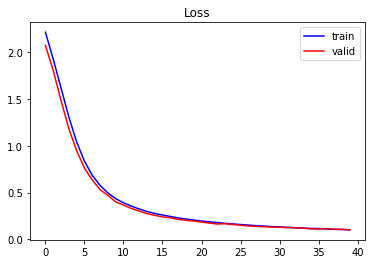

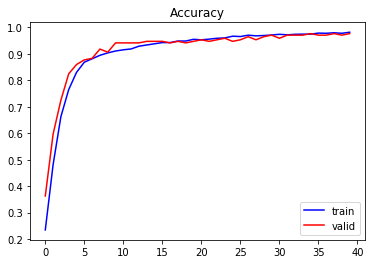

In [10]:
plt.plot(train_loss, 'b', label='train')
plt.plot(valid_loss, 'r', label='valid')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(train_acc, 'b', label='train')
plt.plot(valid_acc, 'r', label='valid')
plt.legend(loc=4)
plt.title("Accuracy")
plt.show()

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
y_predict = model.predict_classes(x_test)
y_test_label = np.argmax(y_test, axis=1)

In [13]:
print('Accuracy in testing data:', accuracy_score(y_test_label, y_predict))

Accuracy in testing data: 0.9777777777777777


In [14]:
tf.global_variables()

[<tf.Variable 'dense/kernel:0' shape=(64, 25) dtype=float32>,
 <tf.Variable 'dense/bias:0' shape=(25,) dtype=float32>,
 <tf.Variable 'dense_1/kernel:0' shape=(25, 10) dtype=float32>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32>,
 <tf.Variable 'Adam/iterations:0' shape=() dtype=int64>,
 <tf.Variable 'Adam/lr:0' shape=() dtype=float32>,
 <tf.Variable 'Adam/beta_1:0' shape=() dtype=float32>,
 <tf.Variable 'Adam/beta_2:0' shape=() dtype=float32>,
 <tf.Variable 'Adam/decay:0' shape=() dtype=float32>,
 <tf.Variable 'training/Adam/Variable:0' shape=(64, 25) dtype=float32>,
 <tf.Variable 'training/Adam/Variable_1:0' shape=(25,) dtype=float32>,
 <tf.Variable 'training/Adam/Variable_2:0' shape=(25, 10) dtype=float32>,
 <tf.Variable 'training/Adam/Variable_3:0' shape=(10,) dtype=float32>,
 <tf.Variable 'training/Adam/Variable_4:0' shape=(64, 25) dtype=float32>,
 <tf.Variable 'training/Adam/Variable_5:0' shape=(25,) dtype=float32>,
 <tf.Variable 'training/Adam/Variable_6:0' shape=(25,

In [15]:
# save model
model.save('my_model.h5')

# load model
another_model = tf.keras.models.load_model('my_model.h5')

In [16]:
y_predict = another_model.predict_classes(x_test)
y_test_label = np.argmax(y_test, axis=1)
print('Accuracy in testing data:', accuracy_score(y_test_label, y_predict))

Accuracy in testing data: 0.9666666666666667


# Practice
Build a cat-dog-classifier with tf.keras

In [16]:

import pandas as pd
pd.DataFrame({'class': y_predict} ,index = x_test.id).to_csv('pokemon_submission.csv') 

AttributeError: 'numpy.ndarray' object has no attribute 'id'